# CSS5228 Final Project

In this notebook, we will start training our model

- Random Forest Base - MAE: 331763.892261509

In [8]:
import pandas as pd
import numpy as np
from pathlib import Path

from efficient_apriori import apriori

import matplotlib.pyplot as plt
# import seaborn as sns


In [9]:
df_train = pd.read_csv("../../raw_data/train.csv", index_col=0)
# df_test = pd.read_csv("../../clean_data/test_preproc.csv", index_col=0)

In [10]:
df_train

,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,floor_level,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
listing_id,,,,,,,,,,,,,,,,,,,,
122881,hdb flat for sale in 866 yishun street 81,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115,NaN,unspecified,NaN,116.0,https://www.99.co/singapore/hdb/866-yishun-str...,1.414399,103.837196,0,yishun south,yishun,514500.0
259374,hdb flat for sale in 506b serangoon north aven...,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575,NaN,unspecified,"1, 2, 3, 4, 5, 6 br",NaN,https://www.99.co/singapore/hdb/hdbserangoon-e...,1.372597,103.875625,0,serangoon north,serangoon,995400.0
665422,4 bed condo for sale in meyerhouse,128 meyer road,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070,low,partial,"studio, 3, 4, 5, 6 br",56.0,https://www.99.co/singapore/condos-apartments/...,1.298773,103.895798,0,mountbatten,marine parade,8485000.0
857699,3 bed condo for sale in leedon green,26 leedon heights,leedon green,Condo,freehold,2023.0,3.0,2.0,958,NaN,partial,"studio, 1, 2, 3, 4 br",638.0,https://www.99.co/singapore/condos-apartments/...,1.312364,103.803271,0,farrer court,bukit timah,2626000.0
216061,2 bed condo for sale in one bernam,1 bernam street,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732,NaN,unspecified,"studio, 1, 2, 3, 4, 5 br",351.0,https://www.99.co/singapore/condos-apartments/...,1.273959,103.843635,0,anson,downtown core,1764000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345066,2 bed condo for sale in lentor modern,lentor central,lentor modern,condo,99-year leasehold,2026.0,2.0,2.0,635,NaN,unspecified,"1, 2, 3, 4 br",605.0,https://www.99.co/singapore/condos-apartments/...,1.385938,103.834466,0,tagore,ang mo kio,1050000.0
868680,2 bed condo for sale in mori,223 guillemard road,mori,Condo,freehold,2026.0,2.0,2.0,883,NaN,unspecified,"1, 2, 3, 4 br",137.0,https://www.99.co/singapore/condos-apartments/...,1.315948,103.857589,0,lavender,kallang,2087400.0
928187,4 bed condo for sale in pullman residences newton,18 dunearn road,pullman residences newton,condo,freehold,2023.0,4.0,4.0,1378,NaN,unspecified,"studio, 1, 2, 3, 4, 5 br",340.0,https://www.99.co/singapore/condos-apartments/...,1.315961,103.836848,0,moulmein,novena,4193700.0


In [17]:
cls = df_train[['num_beds','num_baths']].dropna()
from sklearn.cluster import KMeans
ssd = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(cls)
    ssd.append(kmeans.inertia_)

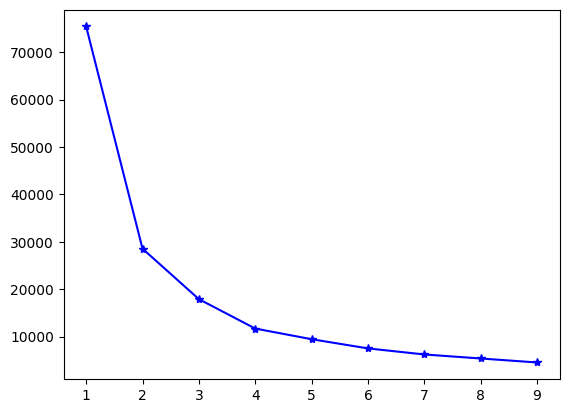

In [18]:
plt.plot(range(1,10),ssd,marker='*',color='b')

In [22]:
model=KMeans(n_clusters=3,random_state=10)
cluster_kmeans=model.fit_predict(cls)
# data_cluster['kmeans_cluster']=cluster_kmeans
# data_cluster.head()

AttributeError: 'numpy.float64' object has no attribute 'plot'

In [77]:
ap_input_trans = ap_input_df.values.tolist()



In [78]:
ap_input_trans_set = [set(trans) for trans in ap_input_trans]
# ap_input_trans_set

In [79]:
itemsets, rules = apriori(ap_input_trans_set, min_support=0.1, min_confidence=0.1, max_length=4)

In [80]:
for k, k_itemsets in itemsets.items():
    print('All {}-itemsets:'. format(k))
    for k_itemset, support_count in k_itemsets.items():
        print('\t{}-itemset {} -- support count: {}'.format(k, k_itemset, support_count))

All 1-itemsets:
	1-itemset ('unspecified',) -- support count: 14716
	1-itemset ('hdb',) -- support count: 2288
	1-itemset ('condo',) -- support count: 7905
	1-itemset ('partial',) -- support count: 2989
All 2-itemsets:
	2-itemset ('condo', 'unspecified') -- support count: 5022
	2-itemset ('hdb', 'unspecified') -- support count: 2243


In [81]:
for rule in rules:
    print(rule)

{unspecified} -> {condo} (conf: 0.341, supp: 0.248, lift: 0.874, conv: 0.926)
{condo} -> {unspecified} (conf: 0.635, supp: 0.248, lift: 0.874, conv: 0.750)
{unspecified} -> {hdb} (conf: 0.152, supp: 0.111, lift: 1.349, conv: 1.047)
{hdb} -> {unspecified} (conf: 0.980, supp: 0.111, lift: 1.349, conv: 13.902)


In [82]:
for rule in rules:
    left_hand_side = rule.lhs    # or antecedent
    right_hand_side = rule.rhs   # or consequent
    support = rule.support
    confidence = rule.confidence
    lift = rule.lift
    conviction = rule.conviction
    print('{} => {} -- lift: {}'.format(left_hand_side, right_hand_side, lift))

('unspecified',) => ('condo',) -- lift: 0.8743712325919767
('condo',) => ('unspecified',) -- lift: 0.8743712325919767
('unspecified',) => ('hdb',) -- lift: 1.3492557574933899
('hdb',) => ('unspecified',) -- lift: 1.3492557574933899


In [ ]:
def get_pref_feature_bases(pref):
    if pref in rules:
        for rule in rules:
            left_hand_side = rule.lhs    # or antecedent
            right_hand_side = rule.rhs   # or consequent
            support = rule.support
            confidence = rule.confidence
            lift = rule.lift
            conviction = rule.conviction
            print('{} => {} -- lift: {}'.format(left_hand_side, right_hand_side, lift))
            
            if lift > threshold:
                return rule
            

def get_top_recommendations(user_preferences):
    recommendation_to_user = []
    for pref in user_preferences:
        recom, score = get_pref_feature_bases(pref)

        if score > threshold:
            recommendation_to_user.append(recom)

    return recommendation_to_user


    

In [107]:
from sklearn.neighbors import NearestNeighbors

class Recommender:
    def __init__(self, X):
        self.X = X


    def feature_selection(self, feature_list):
        return self.X[feature_list]


    def train_model(self, model_input):
        nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(model_input)
        distances, indices = nbrs.kneighbors(model_input)
        return indices


    def find_house_recommendations(self, recommendations, visited_house_history, num_of_recom = 10):
        filtered_houses = recommendations[visited_house_history]
        return filtered_houses



In [122]:
X = pd.read_csv("../../clean_data/train_preproc.csv", index_col=0)

obj = Recommender(X)


model_input = obj.feature_selection(['size_per_room','num_baths','num_beds','size_sqft'])

recommendations = obj.train_model(model_input)


visited_house_history = [10536, 14794]
filtered_houses = recommendations[visited_house_history]

recom_indices = obj.find_house_recommendations(recommendations, visited_house_history = visited_house_history, num_of_recom = 10)

for house in range(len(visited_house_history)):
    final_houses_to_recommend = X.iloc[recom_indices[house]]
    print(final_houses_to_recommend.shape)


(10, 39)
(10, 39)


,num_beds,num_baths,size_sqft,total_num_units,lat,lng,price,mean_tenure_price,active_years,remaining_lease,...,property_type_landed,property_type_semi-detached house,property_type_terraced house,property_type_townhouse,property_type_walk-up,furnishing_fully,furnishing_na,furnishing_partial,furnishing_unfurnished,furnishing_unspecified
14794,3.0,2.0,1118,106.0,1.382643,103.743532,572200.0,1.887102e+06,29.0,70.0,...,0,0,0,0,0,0,0,0,0,1
10536,3.0,2.0,1118,-1.0,1.335292,103.770954,840000.0,1.887102e+06,33.0,66.0,...,0,0,0,0,0,0,0,0,0,1
7477,3.0,2.0,1118,-1.0,1.348228,103.941222,659400.0,1.887102e+06,34.0,65.0,...,0,0,0,0,0,0,0,0,0,1
819,3.0,2.0,1118,-1.0,1.332789,103.866578,682500.0,1.887102e+06,38.0,61.0,...,0,0,0,0,0,0,0,0,0,1
291,3.0,2.0,1119,95.0,1.343526,103.696193,513300.0,1.887102e+06,32.0,67.0,...,0,0,0,0,0,0,0,0,0,1
104,3.0,2.0,1119,-1.0,1.326164,103.902162,556500.0,1.887102e+06,36.0,63.0,...,0,0,0,0,0,0,0,0,0,1
15,3.0,2.0,1119,129.0,1.381630,103.742102,554400.0,1.887102e+06,30.0,69.0,...,0,0,0,0,0,0,0,0,0,1
51,3.0,2.0,1119,206.0,1.349949,103.949946,617400.0,1.887102e+06,38.0,61.0,...,0,0,0,0,0,0,0,0,0,1
154,3.0,2.0,1119,91.0,1.385089,103.740921,514500.0,1.887102e+06,29.0,70.0,...,0,0,0,0,0,1,0,0,0,0
209,3.0,2.0,1119,58.0,1.316431,103.857532,2324700.0,4.723458e+06,-1.0,-1.0,...,0,0,0,0,0,0,0,0,1,0
